# Classificação dos tipos de cogumelo

O objetivo desse projeto é conseguir classificar um cogumelo como comestível ou venenoso.

- Esther Dagir
- Gustavo Katz
- Lila Habda
- Rafael Oncins

### Importando bibliotecas e fazendo a leitura do Dataframe

In [37]:
# Bibliotecas que serão utilizadas no código
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree #biblioteca usada para Árvore de decisão

#leitura do Dataframe
df = pd.read_csv('mushrooms.csv')

In [38]:
# Dataframe dos cogumelos
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Nossa intenção é conseguir utilizar o dataframe acima para determinar a classe ("p"= venenoso; "e"= comestível) do cogumelo conforme suas outras características.

## Análise exploratória

A ideia nessa análise é avaliar a influência de cada categoria na determinação de um cogumelo como comestível ou venenoso. Para isso, vamos criar gráficos que analisam a frequência de determinada característica em cada tipo de cogumelo, conforme cada categoria (coluna).

C:\Users\55119\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


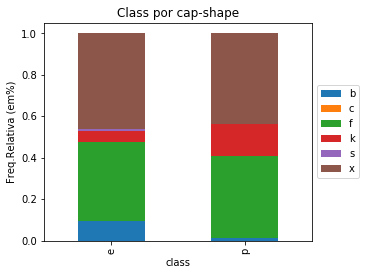

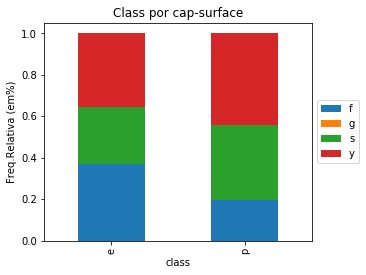

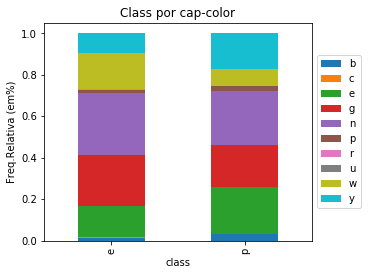

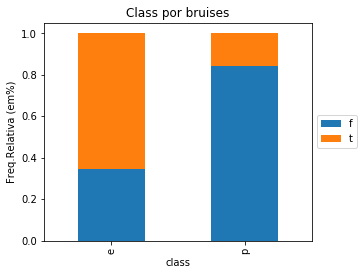

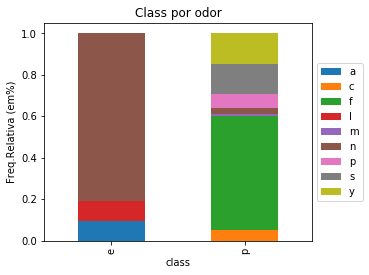

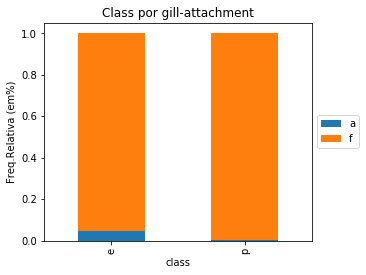

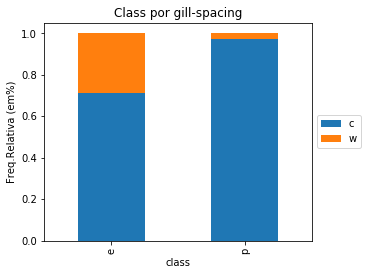

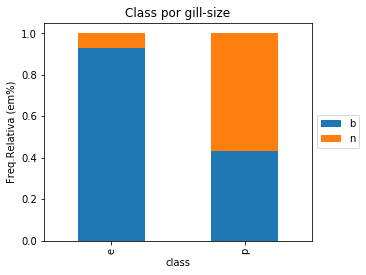

In [39]:
# Para construir um gráfico para cada coluna, vamos dividir em três células a fim de facilitar a visualização
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}') #Plotando os gráficos pelas categorias da lista por class (comestível ou tóxico)
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\55119\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


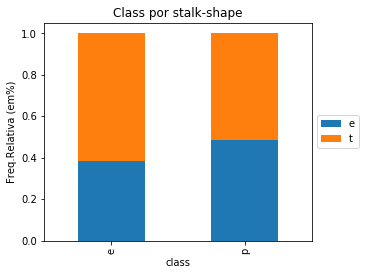

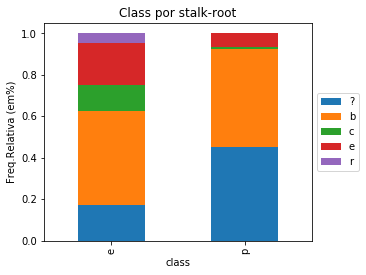

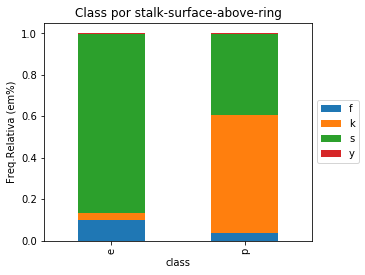

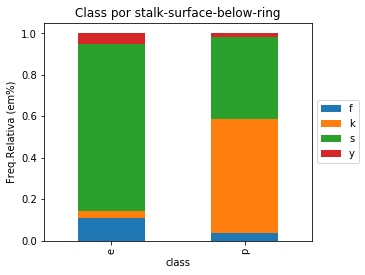

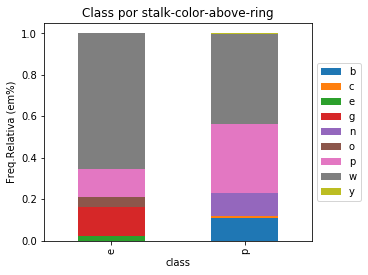

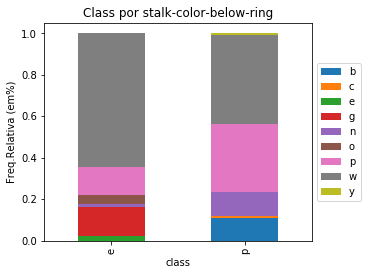

In [40]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}') #Plotando os gráficos pelas categorias da lista por class (comestível ou tóxico)
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\55119\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


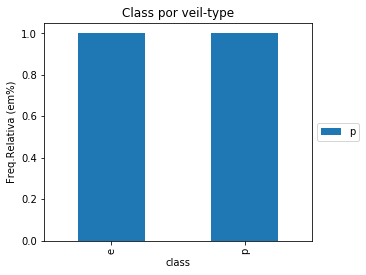

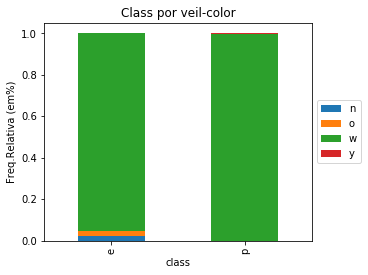

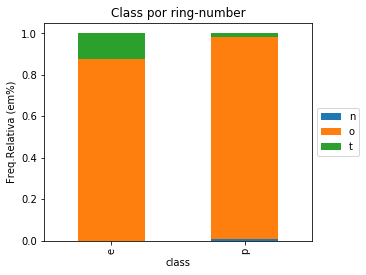

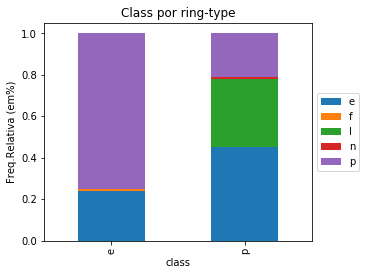

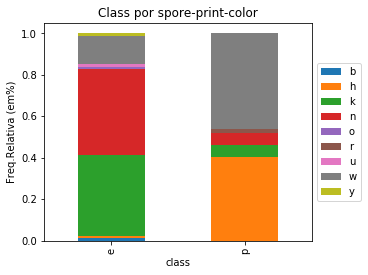

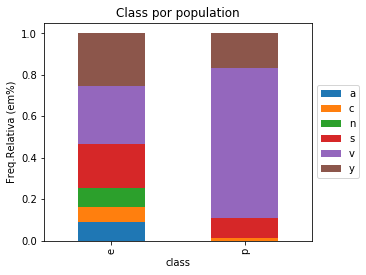

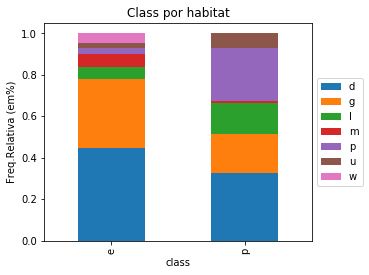

In [41]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}') #Plotando os gráficos pelas categorias da lista por class (comestível ou tóxico)
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Análise inicial
A partir da análise dos gráficos, foi possível identificar as categorias que mais influenciam a determinação de um cogumelo como comestível ou venenoso. Dessa maneira, filtramos algumas categorias:

odor, stalk-color-above-ring, ring-type, spore-print-color, population, habitat

odor, stalk-color-above-ring, ring-type, spore-print-color, population, habitat

Justificativa pela escolha das categorias:
- Odor: Pode-se perceber que pelo gráfico odor X class, a primeira tem uma grande influência na segunda já que há uma grande distinção das características e o odor do tipo "n" parece ser um fator de relevância para a classe "comestível".


- Stalk-color-above-ring: Apesar de o tipo "p" e "w" apresentarem relevância nas duas classes, pode-se notar uma boa diferenciabilidade entre elas nos outros tipos, visto que essas, por sua peculiaridade, farão uma distinção de comestível e não comestível.


- Ring-type: Nesse gráfico, é possível observar principalmente a influência da característica "l" muito presente nos cogumelos venenosos.


- Spore-print-color: Nesse gráfico, embora ambas as classes tenham essas características, a classe "comestível" tem uma alta frenquência dos fatores "n" e "k", enquanto a classe do tipo "venenoso" tem uma alta frenquência dos fatores "w" e "h".


- Population: Assim como no item 2, os tipos "v", "s" e "y" apresentam grande presença nos tipos comestível e não comestível. No entanto, os demais tipos tem uma maior diferença, sendo esse em maioria no comestível, o que permite diferenciar tais classes.


- Habitat: No gráfico do habitat, aparentemente há uma semelhança entre os fatores para ambas classes, porém as quantidades são diferentes para cada classe, principalmente do tipo "p".

A partir desse ponto, nós vamos utilizar apenas essas colunas como referências para o nosso modelo. Portanto, criamos um novo dataframe:

In [42]:
# Separando somente as colunas que serão utilizadas na classificação
cl_utilizadas = df.loc[:,['odor','stalk-color-above-ring','ring-type','spore-print-color','population','habitat']]
cl_utilizadas

,odor,stalk-color-above-ring,ring-type,spore-print-color,population,habitat
0,p,w,p,k,s,u
1,a,w,p,n,n,g
2,l,w,p,n,n,m
3,p,w,p,k,s,u
4,n,w,e,n,a,g
...,...,...,...,...,...,...
8119,n,o,p,b,c,l
8120,n,o,p,b,v,l
8121,n,o,p,b,c,l
8122,y,w,e,w,v,l


Agora, para facilitar a leitura dos dados, vamos trocar as variáveis letras por números, de modo que novas colunas serâo criadas para cada variável. Assim, o valor 1 representará a presença de tal característica e o valor 0 representará a sua ausência.  

In [43]:
x = pd.get_dummies(cl_utilizadas) # trocando as variáveis de letras por números usando get dummies
x.head(5)

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-color-above-ring_b,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
# Nessa célula, estamos trocando as letras por números também no nosso target
# A partir de agora, 0 corresponde a comestível e 1 corresponde a venenoso
df['class'] = df['class'].replace('e', 0)
df['class'] = df['class'].replace('p', 1)
y = df['class']

### Árvore de decisão

A árvore de decisão é um método utilizado para facilitar a análise de possíveis resultados diferentes de um determinado assunto. Ou seja, a partir de uma árvore de decisão, é possível mapear os resultados conforme diferentes escolhas e diferentes probabilidades. Com ela, poderemos avaliar como se comporta o processo de classificação conforme as características mais influentes. Utilizamos o link a seguir para esclarecer o conceito:

https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao


https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2


Com isso, vamos criar uma árvore de decisão com as categorias selecionadas a fim de observar o seu comportamento. Ou seja, a nossa árvore vai nos ajudar a reconhecer quais são as características mais significativas para determinar se um cogumelo é ou não comestível.

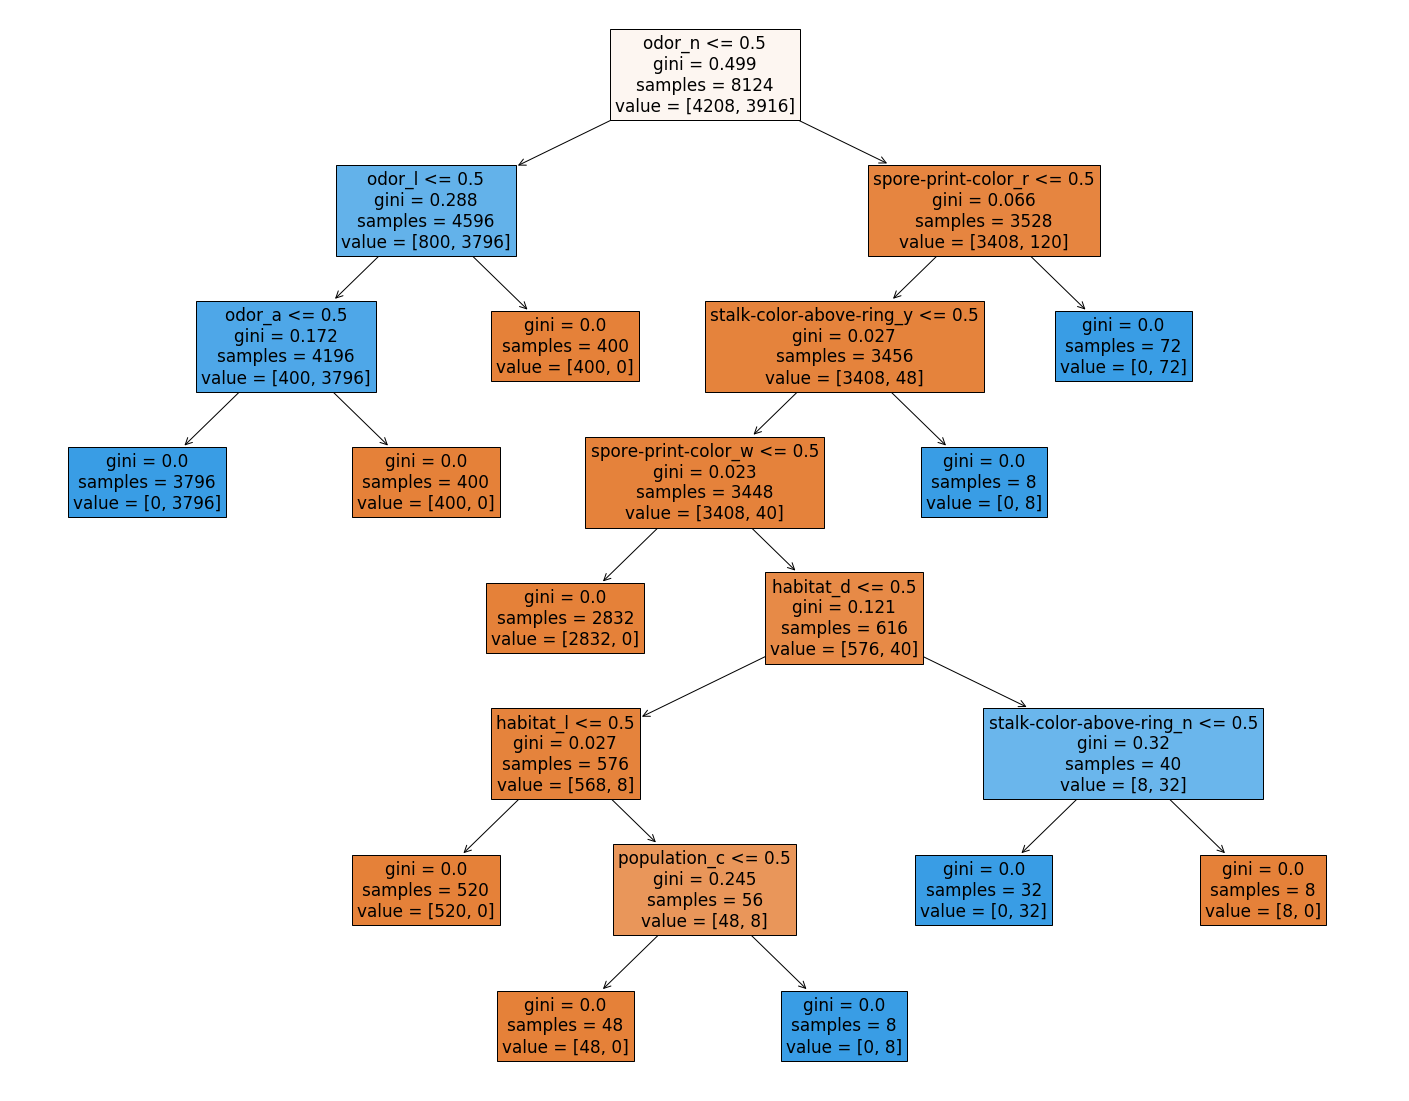

In [45]:
# árvore de decisão
# uma maneira de classificar um cogumelo como comestível ou venenoso, com base nas características selecionadas acima
clf = tree.DecisionTreeClassifier(random_state = 0) #esquematizando uma árvore de decisão 
clf = clf.fit(x, df['class'])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=x.columns, filled=True)

A árvore de decisão facilitou a compreensão das principais características que influenciam na classificação dos cogumelos. No caso, podemos observar que o odor do tipo "n" parece ser um fator significante nesse processo de seleção. Além dele, o odor do tipo "l" e o spore-print-color do tipo "r" aparentam ser fatores significantes também.

## Implementando os modelos de predição

Agora que já fizemos a análise exploratória para entender melhor nosso Dataframe, vamos iniciar as implementação dos modelos de predição.

Para começar, vamos separar os dados em uma coluna de treinamento e uma de teste. Essas colunas serão usadas para ambos os modelos de predição. 
A planilha de testes corresponde a 20% dos dados, e os outros 80% serão utilizados para o treinamento. 

In [46]:
# Separando os dados em treinamento e teste
from sklearn.model_selection import train_test_split #biblioteca sklearn

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

### Primeiro modelo

Nesse primeiro modelo, utilizamos o ExtraTreesClassifier da biblioteca sklearn para fazer nossa predição. Assim, o classificador irá utilizar a parte dos dados destinada ao treinamento para se ajustar e criar um modelo de predição conforme essas informações. Em seguida, com o comando "score()" o modelo consegue fazer uma predição com base no modelo criado. O resultado obtido corresponde a porcentagem de acerto do classificador.

In [47]:
# Criando o modelo com base na planilha de treinamento
from sklearn.ensemble import ExtraTreesClassifier  # importando biblioteca utilizada 

modelo1 = ExtraTreesClassifier(n_estimators = 100) 
M1 = modelo1.fit(x_treino, y_treino) # modelo ajustado

In [48]:
# análise do resutado da aplicação do classificador na própria planilha de treinamento
resultado_treino = M1.score(x_treino, y_treino) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_treino}')

Precisão do modelo utilizado na planilha de treinamento: 1.0


Como foi possível notar na célula acima, o modelo utilizado funciona muito bem na planilha de treinamento, apresentando 100% de acertos na predição. Assim, o modelo está pronto para conseguir avaliar a planilha de testes podendo chegar a resultados mais precisos.

In [49]:
# resultado obtido com a planilha teste
resultado_teste = M1.score(x_teste, y_teste) 

print(f'Resultado do modelo de predição aplicado a planilha de testes: {resultado_teste}')

Resultado do modelo de predição aplicado a planilha de testes: 1.0


Como foi possível observar, o nosso modelo utilizado obteve 100% de acertos mesmo na planilha de teste. Ou seja, o modelo tem um comportamento perfeito de modo que consiga analisar e classificar corretamente diferentes tipos de cogumelo.

### Segundo modelo

No segundo modelo, utilizamos a mesma biblioteca sklearn, e os mesmos dados de treinamento e teste, a fim de ser uma melhor maneira de comparar os resultados no final. Nesse caso, utilizamos a técnica da regressão logística para gerar um classificador.

In [50]:
# Criando o modelo com base na planilha de treinamento
from sklearn.linear_model import LogisticRegression # importando biblioteca utilizada 

modelo2= LogisticRegression(fit_intercept = False)# aplicando a regressão logística no modelo
M2 = modelo2.fit(x_treino, y_treino) # modelo ajustado

C:\Users\55119\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
# resutado da aplicação do classificador na própria planilha de treinamento
resultado_treino2 = M2.score(x_treino, y_treino) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_treino2}')

Precisão do modelo utilizado na planilha de treinamento: 0.9989229112171103


Na célula acima, foi obtido a precisão do modelo quando utilizado na planilha de treinamento. Assim, é possível notar que houva uma taxa muito alta de precisão, atingindo mais de 99%. Assim, o classificador está bom o suficiente para conseguir ser implementado na planilha de teste.

In [52]:
# resultado obtido com a planilha teste
resultado_teste2 = M2.score(x_teste, y_teste) 

print(f'Acurácia do teste: {resultado_teste2}')

Acurácia do teste: 0.9993846153846154


A partir do resultado obtido acima, pode-se perceber que o classificador teve um ótimo desempenho nos testes, obtendo mais uma vez uma taxa de precisão maior que 99%. Desse modo, o segundo modelo que utilizamos também tem uma ótima performance para classificar os cogumelos como sendo ou não comestíveis.

In [53]:
# análise dos coeficientes obtidos para cada coluna no modelo da regressão logística

coeficientes = pd.DataFrame(data={'coeficientes':abs(M2.coef_[0]),'treinamento':x_treino.columns})
coeficientes.sort_values('coeficientes').tail(10)

,coeficientes,treinamento
29,2.294232,spore-print-color_u
33,2.657635,population_c
2,2.911866,odor_f
1,3.486882,odor_c
44,3.553005,habitat_w
3,3.601900,odor_l
0,3.608404,odor_a
6,4.547002,odor_p
5,5.584120,odor_n
28,5.771522,spore-print-color_r


Na célula acima, estão representados os módulos dos coeficientes do modelo logístico. Com os resultados obtidos, é possível observar o comportamento de determinadas características que influenciam mais na definição de um cogumelo como comestível ou venenoso. Algo que é possível observar é que os maiores valores de coeficiente representam algumas das características que nós havíamos observado que mais influenciavam no modelo, por exemplo o odor "n" e o spore-print-color "r" foram dois fatores já observados na árvore de decisão (na análise exploratória). Assim, com essa análise, conseguimos confirmar nossas suspeitas iniciais quanto ao comportamento de algumas características no processo de classificação.

# Conclusão

Em suma, foi possível observar que nossa análise do Dataframe chegou a ótimos resultados em ambos os modelos. Algo que deve ter facilitado foi a escolha do Dataframe, que possuía uma grande quantidade de dados e também revelava várias características marcantes para determinar um cogumelo como comestível ou venenoso.



Assim, conseguimos obter ótimos resultados a partir desses dados. Também foi possível notar que o primeiro modelo de árvores de decisão teve um ótimo comportamento, chegando a 100% de taxa de acerto, o que acreditamos que se deve pelo fato de, em casos como esse, árvores de decisão terem uma ótima performance.



E o nosso segundo modelo também apresentou uma performance muito boa, uma vez que teve taxa de mais de 99% de acerto. Acreditamos que esse alto valor se deve pelas características principalmente do tipo odor e spore-print-color, uma vez que na regressão logística esses representaram os maiores coeficientes, ou seja, foram os principais fatores no processo de classificação.



Portanto, podemos concluir que existem alguns fatores que, quando combinados, são fundamentais para determinar a classe de um cogumelo, o principal exemplo é o odor e o spore-print-color.

# Link de Referência

Biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Árvore de decisão: https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao,  https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2

Regressão Logística: https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels
